In [1]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

In [12]:
class  TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):

        self.params = {}

        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)

        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum( y == t ) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

In [13]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)

In [16]:
net.params['W1'].shape

(784, 100)

In [17]:
net.params['b1'].shape

(100,)

In [18]:
x = np.random.rand(100, 784)
y = net.predict(x)

In [19]:
t = np.random.rand(100, 10)

grad = net.numerical_gradient(x, t)

grad['W1'].shape, grad['b1'].shape, grad['W2'].shape, grad['b2'].shape


((784, 100), (100,), (100, 10), (10,))

In [22]:
import sys
import os
sys.path.append('/Users/jenahii/DL study')
from deep_learning_from_scratch_master.dataset.mnist import load_mnist

In [23]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

iter_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iter_num):
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = network.numerical_gradient(x_batch, t_batch)

    for key in ('W1','b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

KeyboardInterrupt: 

In [24]:
train_loss_list

[2.291023403562171,
 2.2869469029381193,
 2.2871264266786366,
 2.2987773813545256,
 2.29517224004215,
 2.2905749168722047,
 2.2854917647729605,
 2.2944637471832245,
 2.2732301525028142,
 2.281824948640656,
 2.3009568249545267,
 2.2943914201274684,
 2.282854631967212,
 2.260833867598922,
 2.3049685899766037,
 2.3022117385887766,
 2.2953122997240647,
 2.276948630969533,
 2.2811590832203574,
 2.2970104539750453,
 2.3014584502385986,
 2.300215794647178,
 2.2900681325340213,
 2.29778291332461,
 2.2861221529320286,
 2.289187773562726,
 2.3009960996737924,
 2.293657870642032,
 2.3022045220877727,
 2.2880645268410738,
 2.2922472571382047,
 2.2877715105084215,
 2.2809187061167613,
 2.2787558928884546,
 2.290492750289549,
 2.302248023342451,
 2.2933364708040944,
 2.289868608971845,
 2.2981760937865747,
 2.2878417462294425,
 2.3006294616385183,
 2.293828392450574,
 2.2815378363931242,
 2.273967247508394,
 2.287224239965612,
 2.292924335018732,
 2.252748006356958,
 2.30399409721102,
 2.29462417061

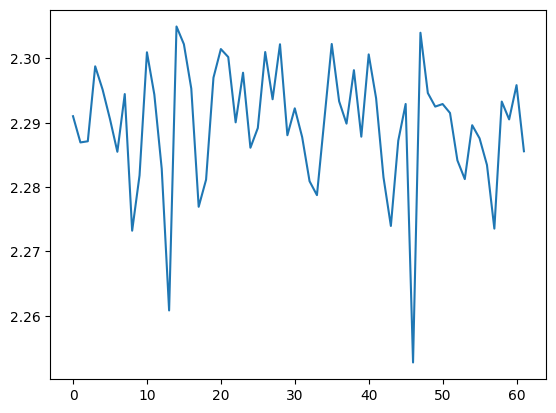

In [25]:
import matplotlib.pyplot as plt

plt.plot(train_loss_list)

In [29]:
import numpy as np
#from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list =[]
train_acc_list =[]
test_acc_list =[]

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = network.gradient(x_batch, t_batch)

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        test_acc_list.append(test_acc)
        print('train acc, test acc |' + str(train_acc) +',' + str(test_acc))

train acc, test acc |0.10218333333333333,0.101
train acc, test acc |0.7943333333333333,0.8024
train acc, test acc |0.8755166666666667,0.8781
train acc, test acc |0.8973,0.8996
train acc, test acc |0.90735,0.9079
train acc, test acc |0.9141,0.9148
train acc, test acc |0.9189166666666667,0.9205
train acc, test acc |0.9235666666666666,0.9244
train acc, test acc |0.9262833333333333,0.9264
train acc, test acc |0.9302833333333334,0.9311
train acc, test acc |0.933,0.933
train acc, test acc |0.9361333333333334,0.9364
train acc, test acc |0.9388,0.9383
train acc, test acc |0.94055,0.9392
train acc, test acc |0.9432166666666667,0.9427
train acc, test acc |0.9445166666666667,0.9429
train acc, test acc |0.9459166666666666,0.9436


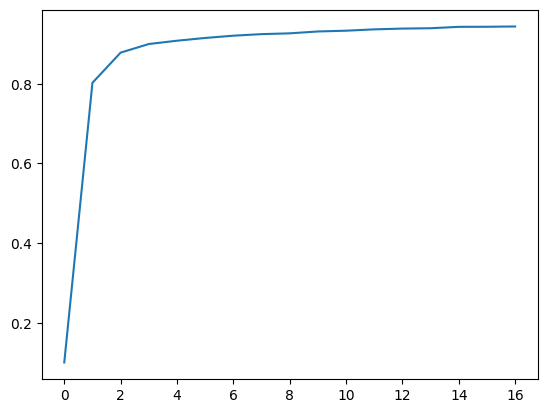

In [30]:
plt.plot(test_acc_list)